<a href="https://colab.research.google.com/github/AtharvaJ-236/Data-Science/blob/main/DS_Prac_5_Anova.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()


Saving Fifa_world_cup_matches.csv to Fifa_world_cup_matches.csv


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd


In [3]:
df = pd.read_csv('Fifa_world_cup_matches.csv')
df.head()


,team1,team2,possession team1,possession team2,possession in contest,number of goals team1,number of goals team2,date,hour,category,...,penalties scored team1,penalties scored team2,goal preventions team1,goal preventions team2,own goals team1,own goals team2,forced turnovers team1,forced turnovers team2,defensive pressures applied team1,defensive pressures applied team2
0,QATAR,ECUADOR,42%,50%,8%,0,2,20 NOV 2022,17 : 00,Group A,...,0,1,6,5,0,0,52,72,256,279
1,ENGLAND,IRAN,72%,19%,9%,6,2,21 NOV 2022,14 : 00,Group B,...,0,1,8,13,0,0,63,72,139,416
2,SENEGAL,NETHERLANDS,44%,45%,11%,0,2,21 NOV 2022,17 : 00,Group A,...,0,0,9,15,0,0,63,73,263,251
3,UNITED STATES,WALES,51%,39%,10%,1,1,21 NOV 2022,20 : 00,Group B,...,0,1,7,7,0,0,81,72,242,292
4,ARGENTINA,SAUDI ARABIA,64%,24%,12%,1,2,22 NOV 2022,11 : 00,Group C,...,1,0,4,14,0,0,65,80,163,361


In [8]:
print("Group categories:")
print(df['category'].unique())


Group categories:
['Group A' 'Group B' 'Group C' 'Group D' 'Group F' 'Group E' 'Group G'
 'Group H' 'Round of 16' 'Quarter-final' 'Semi-final'
 'Play-off for third place' 'Final']


In [9]:
print("\nNormality test per group:")

for g in df['category'].unique():
    stat, p = stats.shapiro(df[df['category'] == g]['total attempts team1'])

    print(f"{g}: p-value = {p:.4f}",
          "-> Normal" if p > 0.05 else "-> Not normal")



Normality test per group:
Group A: p-value = 0.8006 -> Normal
Group B: p-value = 0.2422 -> Normal
Group C: p-value = 0.6020 -> Normal
Group D: p-value = 0.4874 -> Normal
Group F: p-value = 0.9845 -> Normal
Group E: p-value = 0.3351 -> Normal
Group G: p-value = 0.0570 -> Normal
Group H: p-value = 0.1311 -> Normal
Round of 16: p-value = 0.9152 -> Normal
Quarter-final: p-value = 0.6474 -> Normal
Semi-final: p-value = nan -> Not normal
Play-off for third place: p-value = nan -> Not normal
Final: p-value = nan -> Not normal


/tmp/ipython-input-30477689.py:4: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p = stats.shapiro(df[df['category'] == g]['total attempts team1'])


In [10]:
groups = []

for g in df['category'].unique():
    groups.append(df[df['category'] == g]['total attempts team1'])

stat, p = stats.levene(*groups)

print("\nLevene's Test for equal variances:")
print("p-value =", p,
      "-> Variances are equal" if p > 0.05 else "-> Variances are not equal")



Levene's Test for equal variances:
p-value = 0.4190473416599327 -> Variances are equal


In [11]:
anova_result = stats.f_oneway(*groups)

print("One-way ANOVA Result")
print("F-statistic:", anova_result.statistic)
print("p-value:", anova_result.pvalue)

if anova_result.pvalue < 0.05:
    print("Reject H0: Significant difference between groups\n")
else:
    print("Fail to reject H0: No significant difference between groups\n")


One-way ANOVA Result
F-statistic: 1.1516286333503314
p-value: 0.3421200563174388
Fail to reject H0: No significant difference between groups



In [14]:
tukey = pairwise_tukeyhsd(
    endog=df['total attempts team1'],
    groups=df['category'],
    alpha=0.05
)

print("Tukey HSD Post-Hoc Test Result:")
print(tukey)


Tukey HSD Post-Hoc Test Result:
                   Multiple Comparison of Means - Tukey HSD, FWER=0.05                   
         group1                   group2          meandiff p-adj   lower    upper  reject
-----------------------------------------------------------------------------------------
                   Final                  Group A -12.3333 0.5076 -30.7281  6.0614  False
                   Final                  Group B -12.6667 0.4655 -31.0614  5.7281  False
                   Final                  Group C    -12.0 0.5504 -30.3947  6.3947  False
                   Final                  Group D  -7.6667 0.9608 -26.0614 10.7281  False
                   Final                  Group E  -8.1667 0.9388 -26.5614 10.2281  False
                   Final                  Group F -11.6667 0.5934 -30.0614  6.7281  False
                   Final                  Group G     -9.0 0.8856 -27.3947  9.3947  False
                   Final                  Group H  -8.1667 0.9388 -2

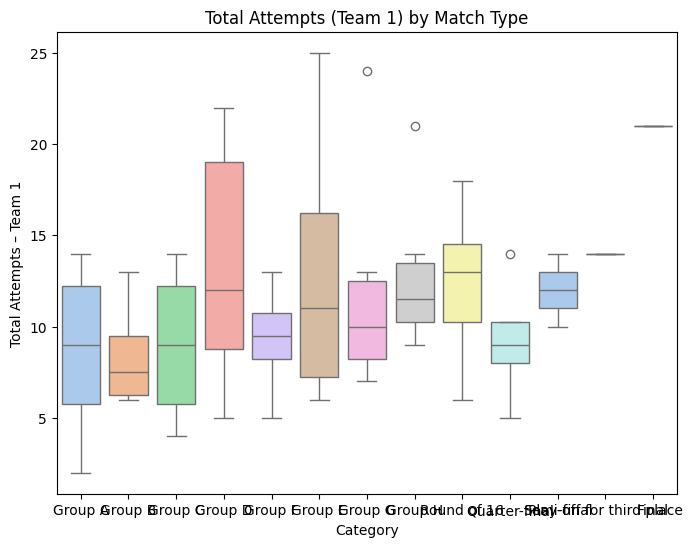

In [16]:
plt.figure(figsize=(8,6))
sns.boxplot(
    x='category',
    y='total attempts team1',
    hue='category',
    data=df,
    palette='pastel',
    dodge=False,
    legend=False
)

plt.title("Total Attempts (Team 1) by Match Type")
plt.xlabel("Category")
plt.ylabel("Total Attempts – Team 1")
plt.show()
